# Calidad de los datos para tabla Players

## 0. Librerias

In [544]:
import sqlite3
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Extraccion de los datos

In [545]:
tabla = 'Player'

In [546]:
conn = sqlite3.connect('database.sqlite')
data = pd.read_sql_query(f"SELECT * FROM {tabla}", conn)

In [547]:
data.shape

(11060, 7)

In [548]:
data.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [549]:
data.dtypes

id                      int64
player_api_id           int64
player_name            object
player_fifa_api_id      int64
birthday               object
height                float64
weight                  int64
dtype: object

## 1.1. Columnas numericas 

In [550]:
#number_cols = data.dtypes[(data.dtypes == np.int64) | (data.dtypes == np.float64)].index
integer_cols = data.select_dtypes(include = ['int']).columns
float_cols = data.select_dtypes(include = ['float']).columns

number_cols = data.select_dtypes(include = ['int','float']).columns
number_cols 

Index(['id', 'player_api_id', 'player_fifa_api_id', 'height', 'weight'], dtype='object')

In [551]:
data[number_cols].describe()

,id,player_api_id,player_fifa_api_id,height,weight
count,11060.000000,11060.000000,11060.000000,11060.000000,11060.000000
mean,5537.511392,156582.427215,165664.910488,181.867445,168.380289
std,3197.692647,160713.700624,58649.928360,6.369201,14.990217
min,1.000000,2625.000000,2.000000,157.480000,117.000000
25%,2767.750000,35555.500000,151889.500000,177.800000,159.000000
50%,5536.500000,96619.500000,184671.000000,182.880000,168.000000
75%,8306.250000,212470.500000,203883.250000,185.420000,179.000000
max,11075.000000,750584.000000,234141.000000,208.280000,243.000000


## 1.2. Columnas categoricas 

In [552]:
#non_number_cols = data.columns.difference(number_cols) 
#non_number_cols = data.dtypes[(data.dtypes != np.int64) & (data.dtypes != np.float64)].index 

object_cols = data.select_dtypes(include = ['object']).columns
boolean_cols = data.select_dtypes(include = ['bool']).columns
date_cols = data.select_dtypes(include = ['datetime']).columns

non_number_cols = data.select_dtypes(include = ['object','bool','datetime']).columns
non_number_cols

Index(['player_name', 'birthday'], dtype='object')

In [553]:
for col in date_cols:
    data[col] = pd.to_datetime(data[col], errors = 'coerce')

In [554]:

data[date_cols].head(3)

""
0
1
2


In [555]:
data["birthday"] = pd.to_datetime(data["birthday"], errors = 'coerce')

data["birthday"].head()

0   1992-02-29
1   1989-12-15
2   1991-05-13
3   1982-05-08
4   1979-11-08
Name: birthday, dtype: datetime64[ns]

In [556]:
data[non_number_cols].info

<bound method DataFrame.info of                player_name   birthday
0       Aaron Appindangoye 1992-02-29
1          Aaron Cresswell 1989-12-15
2              Aaron Doran 1991-05-13
3            Aaron Galindo 1982-05-08
4             Aaron Hughes 1979-11-08
...                    ...        ...
11055       Zoumana Camara 1979-04-03
11056         Zsolt Laczko 1986-12-18
11057            Zsolt Low 1979-04-29
11058  Zurab Khizanishvili 1981-10-06
11059   Zvjezdan Misimovic 1982-06-05

[11060 rows x 2 columns]>

## 1.3 Correlacion

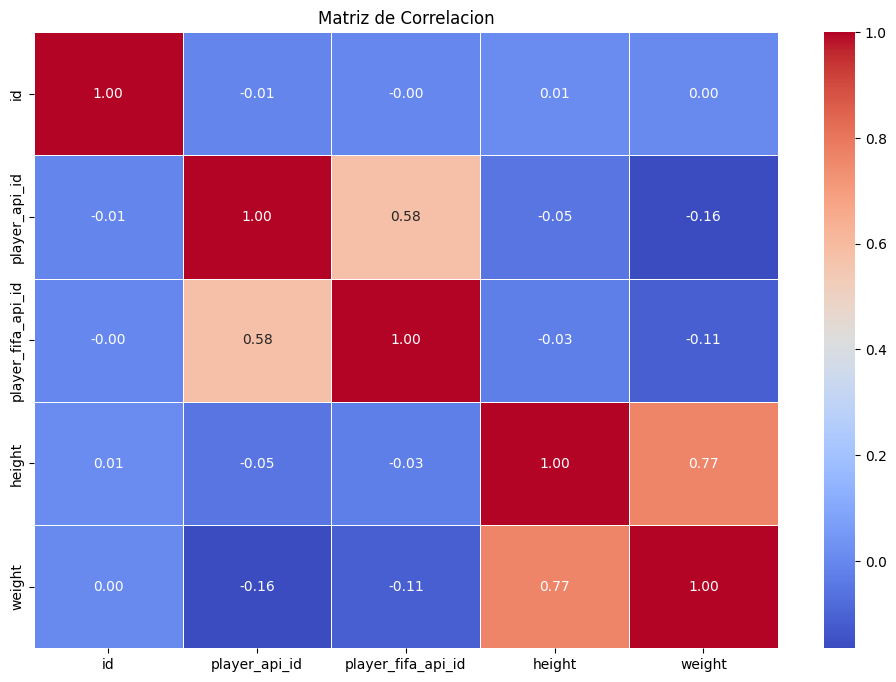

In [557]:
import numpy as np

matriz_correlaciones = data[number_cols].corr()

mask = np.triu(np.ones_like(matriz_correlaciones, dtype=bool))

plt.figure(figsize=(12, 8))
sns.heatmap(matriz_correlaciones, mask=None, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Matriz de Correlacion")
plt.show()

# 2. Calidad de los datos

In [558]:
data_t = data.copy()
data_t.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08,182.88,154


## 2.1. Completitud

In [559]:
data_t.isnull().sum().sort_values(ascending=False)

id                    0
player_api_id         0
player_name           0
player_fifa_api_id    0
birthday              0
height                0
weight                0
dtype: int64

In [560]:
print("Porcentaje nulos por columna: ")
(100 * data_t.isnull().sum()/data_t.shape[0]).sort_values(ascending=False)

Porcentaje nulos por columna: 


id                    0.0
player_api_id         0.0
player_name           0.0
player_fifa_api_id    0.0
birthday              0.0
height                0.0
weight                0.0
dtype: float64

In [561]:
data_t = data_t.dropna()

In [562]:
data_t.dropna(subset = non_number_cols, inplace = True )

In [563]:
for col in number_cols:
    data_t[col].fillna(data_t[col].mean())

In [564]:
data_t.isnull().sum().sort_values(ascending=False)

id                    0
player_api_id         0
player_name           0
player_fifa_api_id    0
birthday              0
height                0
weight                0
dtype: int64

## 2.2. Unicidad

In [565]:
for col in non_number_cols:
    num_duplicated = data_t.duplicated(subset = col).sum()
    print(f"{col}: {num_duplicated}")

player_name: 212
birthday: 5298


In [566]:
data.groupby('player_name').size().sort_values(ascending=False).head()

player_name
Danilo      7
Paulinho    6
Ricardo     5
Adriano     4
Fernando    4
dtype: int64

In [567]:
data_t.duplicated(keep=False).sum()

np.int64(0)

In [568]:
data_t.loc[data_t.duplicated(keep=False)]

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight


In [569]:
for col in number_cols:
    num_duplicated = data_t.duplicated(subset = col).sum()
    print(f"Valores duplicados para la columna {col}: {num_duplicated}")

Valores duplicados para la columna id: 0
Valores duplicados para la columna player_api_id: 0
Valores duplicados para la columna player_fifa_api_id: 0
Valores duplicados para la columna height: 11040
Valores duplicados para la columna weight: 11010


In [570]:
print(f"Porcentage de duplicados: {data_t.duplicated(keep=False).sum() / data.shape[0] * 100:.2f}%")

Porcentage de duplicados: 0.00%


In [571]:
data_t.drop_duplicates(keep = 'first', inplace = True)

In [572]:
data_t.duplicated(keep=False).sum()

np.int64(0)

## 2.3. Consistencia

In [573]:
data_t.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08,182.88,154


## 2.4. Validez

In [574]:
data.dtypes

id                             int64
player_api_id                  int64
player_name                   object
player_fifa_api_id             int64
birthday              datetime64[ns]
height                       float64
weight                         int64
dtype: object